In [1]:
import pandas
pandas.__version__

'0.25.1'

In [2]:
!head bowling_stats.csv

2018, Syracuse, N.Y., 7,556
2017, Las Vegas, Nev., 10,286
2016, Reno, Nev., 8,063
2015, El Paso, Texas, 7,315
2014, Reno, Nev., 9,024
2013, Reno, Nev., 10,253
2012, Baton Rouge, La., 11,794
2011, Reno, Nev.,   12,837
2010, Reno, Nev., 14,189
2009, Las Vegas, Nev., 17,200


CSV is based on 
https://www.bowl.com/Open_Championships/Open_Championships_Home/Past_Results_and_History/

Load the file into Pandas

In [3]:
dframe = pandas.read_csv("bowling_stats.csv")
dframe.head()

,2018,Syracuse,N.Y.,7,556
0,2017,Las Vegas,Nev.,10.0,286.0
1,2016,Reno,Nev.,8.0,63.0
2,2015,El Paso,Texas,7.0,315.0
3,2014,Reno,Nev.,9.0,24.0
4,2013,Reno,Nev.,10.0,253.0


Because Pandas assumes the first row is a header, we need to specify that there is no header

In [4]:
dframe = pandas.read_csv("bowling_stats.csv",header=None)
dframe.head()

,0,1,2,3,4
0,2018,Syracuse,N.Y.,7.0,556.0
1,2017,Las Vegas,Nev.,10.0,286.0
2,2016,Reno,Nev.,8.0,63.0
3,2015,El Paso,Texas,7.0,315.0
4,2014,Reno,Nev.,9.0,24.0


As a check, look at the CSV content

In [5]:
!head bowling_stats.csv

2018, Syracuse, N.Y., 7,556
2017, Las Vegas, Nev., 10,286
2016, Reno, Nev., 8,063
2015, El Paso, Texas, 7,315
2014, Reno, Nev., 9,024
2013, Reno, Nev., 10,253
2012, Baton Rouge, La., 11,794
2011, Reno, Nev.,   12,837
2010, Reno, Nev., 14,189
2009, Las Vegas, Nev., 17,200


_Problem_: last column contains comma and is not wrapped in double quotes.

Label the columns to make manipulation easier to understand.

In [6]:
dframe.columns=['year','city','state','count1','count2']
dframe.head()

,year,city,state,count1,count2
0,2018,Syracuse,N.Y.,7.0,556.0
1,2017,Las Vegas,Nev.,10.0,286.0
2,2016,Reno,Nev.,8.0,63.0
3,2015,El Paso,Texas,7.0,315.0
4,2014,Reno,Nev.,9.0,24.0


Alternatively, we could have labeled the columns at load time using the following:

In [7]:
dframe = pandas.read_csv("bowling_stats.csv",
                            header=None,
                            names=['year','city','state','count1','count2'])

dframe.head()

,year,city,state,count1,count2
0,2018,Syracuse,N.Y.,7.0,556.0
1,2017,Las Vegas,Nev.,10.0,286.0
2,2016,Reno,Nev.,8.0,63.0
3,2015,El Paso,Texas,7.0,315.0
4,2014,Reno,Nev.,9.0,24.0


Since the comma is used as delimiter, we'll need to recombine the two columns.

What about the early counts?

In [8]:
dframe.tail()

,year,city,state,count1,count2
111,1905,Milwaukee,Wis.,217.0,NaN
112,1904,Cleveland,Ohio,112.0,NaN
113,1903,Indianapolis,Ind.,78.0,NaN
114,1902,Buffalo,N.Y.,61.0,NaN
115,1901,Chicago,Ill.,41.0,NaN


The combination of the two columns will be tricky since occasionally there is NaN

In [9]:
dframe.dtypes

year       object
city       object
state      object
count1    float64
count2    float64
dtype: object

combine columns 4 and 5: col_4 = col_4 * 1000 + col_5

In [10]:
dframe['count1']*1000 + dframe['count2']

0       7556.0
1      10286.0
2       8063.0
3       7315.0
4       9024.0
        ...   
111        NaN
112        NaN
113        NaN
114        NaN
115        NaN
Length: 116, dtype: float64

What to do: If 5th column is not NaN, <BR>
    combine columns 4 and 5: col_4 = col_4 * 1000 + col_5

In [11]:
def merge_columns(row):
    if pandas.isna(row['count2']):
        return row['count1']
    else:
        return row['count1']*1000+row['count2']

Apply the function to each row

In [12]:
dframe.apply(merge_columns,axis=1)

0       7556.0
1      10286.0
2       8063.0
3       7315.0
4       9024.0
        ...   
111      217.0
112      112.0
113       78.0
114       61.0
115       41.0
Length: 116, dtype: float64

In [13]:
dframe['total']=dframe.apply(merge_columns,axis=1)

In [14]:
dframe.head()

,year,city,state,count1,count2,total
0,2018,Syracuse,N.Y.,7.0,556.0,7556.0
1,2017,Las Vegas,Nev.,10.0,286.0,10286.0
2,2016,Reno,Nev.,8.0,63.0,8063.0
3,2015,El Paso,Texas,7.0,315.0,7315.0
4,2014,Reno,Nev.,9.0,24.0,9024.0


In [15]:
dframe.tail()

,year,city,state,count1,count2,total
111,1905,Milwaukee,Wis.,217.0,NaN,217.0
112,1904,Cleveland,Ohio,112.0,NaN,112.0
113,1903,Indianapolis,Ind.,78.0,NaN,78.0
114,1902,Buffalo,N.Y.,61.0,NaN,61.0
115,1901,Chicago,Ill.,41.0,NaN,41.0


In [16]:
dframe = dframe[['year', 'city','state', 'total']]
dframe.head()

,year,city,state,total
0,2018,Syracuse,N.Y.,7556.0
1,2017,Las Vegas,Nev.,10286.0
2,2016,Reno,Nev.,8063.0
3,2015,El Paso,Texas,7315.0
4,2014,Reno,Nev.,9024.0


Plot the total versus the year

In [17]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.1'

In [18]:
dframe

,year,city,state,total
0,2018,Syracuse,N.Y.,7556.0
1,2017,Las Vegas,Nev.,10286.0
2,2016,Reno,Nev.,8063.0
3,2015,El Paso,Texas,7315.0
4,2014,Reno,Nev.,9024.0
...,...,...,...,...
111,1905,Milwaukee,Wis.,217.0
112,1904,Cleveland,Ohio,112.0
113,1903,Indianapolis,Ind.,78.0
114,1902,Buffalo,N.Y.,61.0


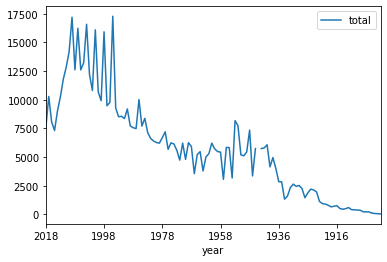

In [19]:
dframe.plot(x='year',y='total')

In [20]:
dframe

,year,city,state,total
0,2018,Syracuse,N.Y.,7556.0
1,2017,Las Vegas,Nev.,10286.0
2,2016,Reno,Nev.,8063.0
3,2015,El Paso,Texas,7315.0
4,2014,Reno,Nev.,9024.0
...,...,...,...,...
111,1905,Milwaukee,Wis.,217.0
112,1904,Cleveland,Ohio,112.0
113,1903,Indianapolis,Ind.,78.0
114,1902,Buffalo,N.Y.,61.0


In [21]:
dframe.dtypes

year      object
city      object
state     object
total    float64
dtype: object

Maybe the x-axis labels broke because the 'year' wasn't numeric.

Let's force the year to be numeric:

In [22]:
dframe['year']=pandas.to_numeric(dframe['year'])

ValueError: Unable to parse string "1943-45" at position 73

In [23]:
pandas.set_option('max_rows', 500)

In [24]:
dframe

,year,city,state,total
0,2018,Syracuse,N.Y.,7556.0
1,2017,Las Vegas,Nev.,10286.0
2,2016,Reno,Nev.,8063.0
3,2015,El Paso,Texas,7315.0
4,2014,Reno,Nev.,9024.0
5,2013,Reno,Nev.,10253.0
6,2012,Baton Rouge,La.,11794.0
7,2011,Reno,Nev.,12837.0
8,2010,Reno,Nev.,14189.0
9,2009,Las Vegas,Nev.,17200.0


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>


One solution would be to manually clean up the CSV.

Alternatively, we can drop that row and see if that solves the problem.

In [25]:
dframe=dframe.drop(73)

In [26]:
dframe['year']=pandas.to_numeric(dframe['year'])

No errors reported, so let's look at the plot

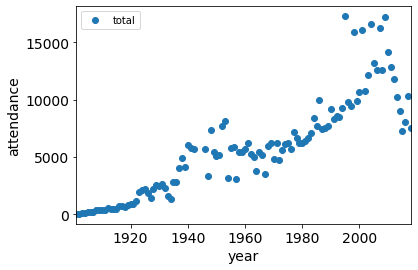

In [27]:
dframe.plot(x='year',y='total',style='o')
plt.tick_params(labelsize=14)
plt.xlabel('year',fontsize=14)
plt.ylabel('attendance',fontsize=14)
plt.show()

Just to confirm, let's check the data type of each column

In [28]:
dframe.dtypes

year       int64
city      object
state     object
total    float64
dtype: object